In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import matplotlib


In-[period] and calendar grosses
Monthly, quarterly, season, and yearly charts can be viewed either by “in-[period] releases” or “calendar grosses”. Viewing by in-[period] releases shows total box office results for releases during that period, regardless of when the money was made. For example, viewing by in-year releases for 2019 shows box office results for all movies released in 2019. A movie released in 2018 will not appear on this chart even if it continued to earn money in 2019. Viewing by calendar grosses shows box office results within a given time period, regardless of when the movies were released. For example, viewing by calendar grosses for 2019 shows box office results for all movies that earned money in 2019. A movie released in 2018 may appear on this chart if it continued to earn money in 2019.

Calendar grosses are based on daily box office receipts or, when daily data is not available, estimates are used and are based on weekend and weekly data and historical box office trends. In cases where a final reported gross is different from its last reported gross for a given movie, the difference is assigned to the two weeks after the last reported gross date. In most cases, this reflects receipts that have trickled in after a movie has stopped being tracked for reportage. Since box office has been more closely tracked in recent years, the calendar gross data is generally considered more comprehensive after 2001, while pre-2001 estimates are considered approximate. Accuracy of calendar grosses improves over a wider range of time viewed.

In [8]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"] = pd.read_excel("/Users/Arsh/Downloads/IMDB_boxoffice_2022_2012.xlsx", sheet_name = str(year), na_values = "-" )

In [9]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"]["release_year"] = year

In [10]:
box_office_decade = pd.concat([box_office_2012,
           box_office_2013,
           box_office_2014,
           box_office_2015,
           box_office_2016,
           box_office_2017,
           box_office_2018,
           box_office_2019,
           box_office_2020,
           box_office_2021,
           box_office_2022], ignore_index=True)

In [11]:
box_office_decade.groupby("release_year").count()

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
release_year,,,,,,,,,,,,,,
2012,200,200,0,0,0,200,198,195,193,195,200,199,199,200
2013,200,200,0,0,0,200,200,199,198,199,200,198,197,200
2014,200,200,0,0,0,200,200,200,200,200,200,199,198,200
2015,200,200,0,0,0,200,200,198,194,198,200,199,198,200
2016,200,200,0,0,0,200,200,199,198,199,200,196,198,200
2017,200,200,0,0,0,200,200,196,196,196,200,198,198,200
2018,200,200,0,0,0,200,200,198,197,198,200,198,192,200
2019,200,200,0,0,0,200,199,197,196,197,200,136,196,200
2020,200,200,0,0,0,200,195,184,153,180,200,6,198,200


In [12]:
box_office_decade.rename(columns = {"Release": "primary_title"}, inplace= True)
box_office_decade.drop(columns = "Estimated", inplace = True)

In [13]:
con = sqlite3.connect('/Users/Arsh/Downloads/im.db')

cursor = con.cursor()


# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names

table_names = cursor.fetchall()

table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [14]:
movie_basics = pd.read_sql("""

SELECT  *
FROM movie_basics


""", con)

In [15]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [16]:
movies = pd.merge(box_office_decade, movie_basics, how = "inner", on = "primary_title")

In [17]:
movies.drop(columns= ["start_year", "original_title", "Genre", "Budget", "Running Time"], inplace= True)

In [18]:
movies["genre1"] = movies["genres"].str.split(',', expand = True)[0]
movies["genre2"] = movies["genres"].str.split(',', expand = True)[1]
movies["genre3"] = movies["genres"].str.split(',', expand = True)[2]
movies.drop(columns= ["genres", "% of Total"], inplace= True)

In [19]:
movies.sample(10)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           2437 non-null   object        
 4   Opening          2413 non-null   object        
 5   Open Th          2413 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [20]:
movies_clean = movies
movies_clean.drop(columns = ["Max Th", "Opening", "Open Th"])

,Rank,primary_title,Gross,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3
0,1,The Avengers,623357910,2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi
1,2,The Dark Knight Rises,448139099,2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None
2,3,The Hunger Games,408010692,2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi
3,4,Skyfall,304360277,2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller
4,5,The Hobbit: An Unexpected Journey,303003568,2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None
2437,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None
2438,194,The Innocents,25705,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None
2439,198,1982,23241,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None


In [21]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2441 entries, 0 to 2440
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Rank             2441 non-null   int64         
 1   primary_title    2441 non-null   object        
 2   Gross            2441 non-null   int64         
 3   Max Th           2437 non-null   object        
 4   Opening          2413 non-null   object        
 5   Open Th          2413 non-null   object        
 6   Open             2441 non-null   datetime64[ns]
 7   Close            2015 non-null   object        
 8   Distributor      2415 non-null   object        
 9   release_year     2441 non-null   int64         
 10  movie_id         2441 non-null   object        
 11  runtime_minutes  2113 non-null   float64       
 12  genre1           2407 non-null   object        
 13  genre2           1752 non-null   object        
 14  genre3           1203 non-null   object 

In [22]:
movies_per_year = movies.groupby("release_year")["release_year"].count()
years = movies["release_year"].value_counts().keys().sort_values()
values = movies["release_year"].value_counts()

years

Int64Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')

In [23]:
movies_per_year

release_year
2012    234
2013    241
2014    254
2015    312
2016    258
2017    286
2018    248
2019    250
2020    158
2021    113
2022     87
Name: release_year, dtype: int64

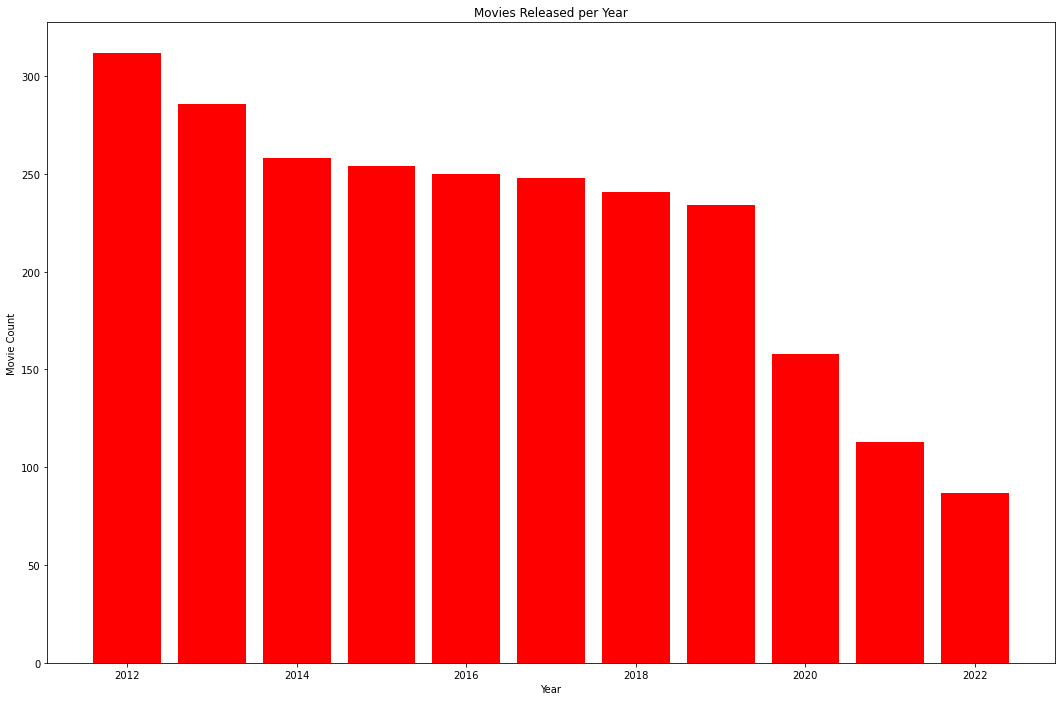

In [24]:
fig, ax = plt.subplots(figsize=(15,10))

# sets up bar plot
ax.bar(years, values, color = "red")
ax.set_xlabel('Year')
#ax.set_xticklabels(rotation=40)
ax.set_ylabel('Movie Count')
ax.set_title('Movies Released per Year')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [25]:
avg_per_genre = movies_clean.groupby("genre1")["Gross"].mean().sort_values(ascending= False)
avg_per_genre

genre1
Family         2.094847e+08
Musical        2.011514e+08
Music          1.022857e+08
Adventure      9.292451e+07
Action         8.518845e+07
Fantasy        8.035287e+07
Sci-Fi         7.338972e+07
Animation      6.912348e+07
Crime          3.989427e+07
Horror         3.743442e+07
Comedy         3.418099e+07
Documentary    3.107247e+07
Thriller       3.052411e+07
Biography      3.038523e+07
Drama          3.012518e+07
Romance        1.215888e+07
Mystery        1.165593e+07
Western        5.399732e+06
Sport          5.310554e+06
War            3.727550e+05
Name: Gross, dtype: float64

<ipython-input-26-61e5424b3f5c>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_per_genre.keys(), rotation=40)


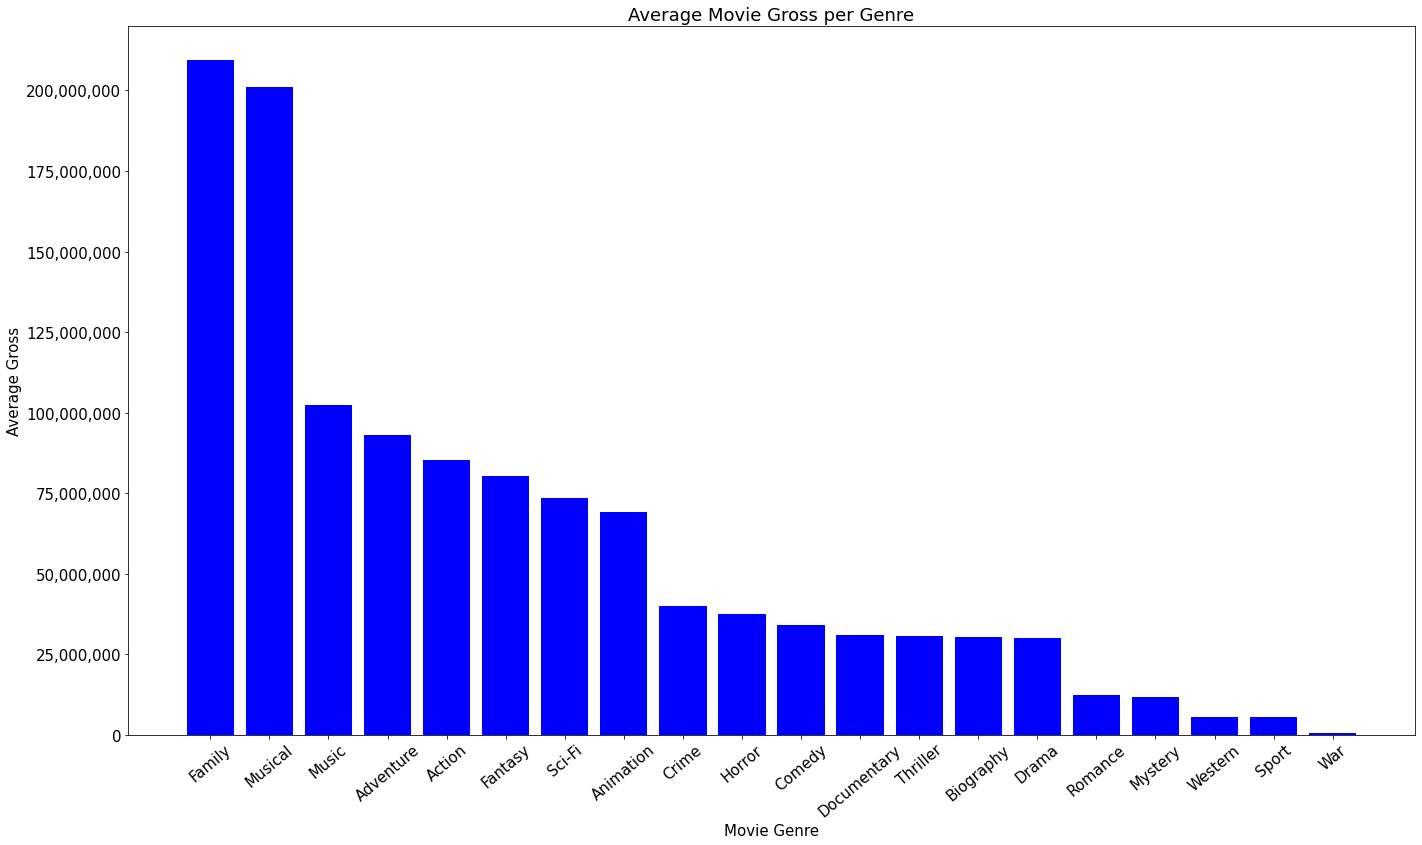

In [26]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_per_genre.keys(), avg_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(avg_per_genre.keys(), rotation=40)
ax.set_ylabel("Average Gross")
ax.set_title('Average Movie Gross per Genre')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [27]:
movies_clean["release_month"] = movies_clean["Open"].apply(lambda x: x.strftime("%b"))

movies_clean

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month
0,1,The Avengers,623357910,"4,349","$207,438,708","4,349",2022-05-04,Oct 4,Walt Disney Studios Motion Pictures,2012,tt0848228,143.0,Action,Adventure,Sci-Fi,May
1,2,The Dark Knight Rises,448139099,"4,404","$160,887,295","4,404",2022-07-20,Dec 13,Warner Bros.,2012,tt1345836,164.0,Action,Thriller,None,Jul
2,3,The Hunger Games,408010692,"4,137","$152,535,747","4,137",2022-03-23,Sep 6,Lionsgate,2012,tt1392170,142.0,Action,Adventure,Sci-Fi,Mar
3,4,Skyfall,304360277,"3,526","$88,364,714","3,505",2022-11-09,Mar 10,Sony Pictures Entertainment (SPE),2012,tt1074638,143.0,Action,Adventure,Thriller,Nov
4,5,The Hobbit: An Unexpected Journey,303003568,"4,100","$84,617,303","4,045",2022-12-14,Apr 25,Warner Bros.,2012,tt0903624,169.0,Adventure,Family,Fantasy,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,193,The Territory,26464,7,"$26,464",7,2022-08-19,NaN,Picturehouse Entertainment,2022,tt2574238,40.0,Documentary,News,None,Aug
2437,194,The Innocents,25705,32,"$12,330",32,2022-05-13,NaN,IFC Films,2022,tt4370784,115.0,Drama,History,None,May
2438,194,The Innocents,25705,32,"$12,330",32,2022-05-13,NaN,IFC Films,2022,tt4677348,98.0,Horror,None,None,May
2439,198,1982,23241,2,"$4,900",1,2022-06-10,NaN,Tricycle Logic,2022,tt2388621,90.0,Drama,None,None,Jun


In [28]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

movies_clean['month'] = pd.Categorical(movies_clean['release_month'], categories=months, ordered=True)

movies_clean.sort_values(by="month",inplace=True)  # same as you have now; can use inplace=True

months = movies_clean.groupby("month")["Gross"].mean().keys()
avg_gross_per_month = movies_clean.groupby("month")["Gross"].mean()

<ipython-input-29-77d1f0f46d86>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=40)


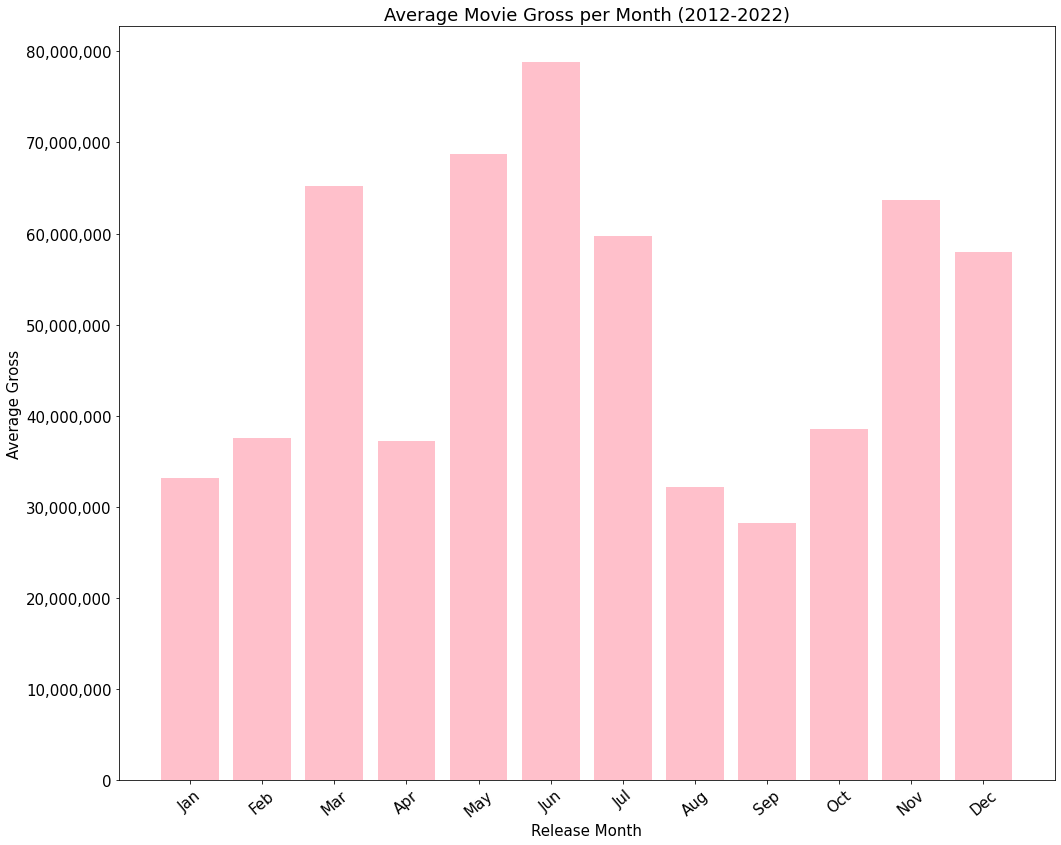

In [29]:
fig, ax = plt.subplots(figsize=(15,12))

# sets up bar plot
ax.bar(months, avg_gross_per_month, color = "pink")
ax.set_xlabel('Release Month')
ax.set_xticklabels(months, rotation=40)
ax.set_ylabel('Average Gross')
ax.set_title('Average Movie Gross per Month (2012-2022)')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [30]:
total_gross_per_year = movies_clean.groupby("release_year")["Gross"].sum()
years = total_gross_per_year.keys()

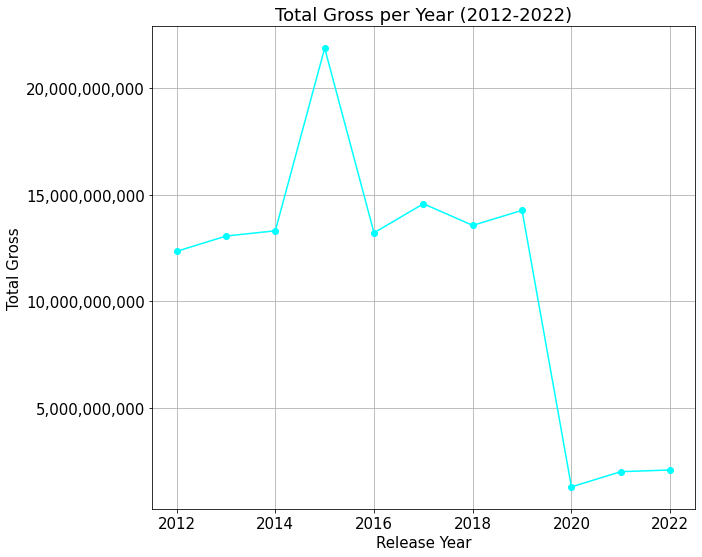

In [31]:
fig, ax = plt.subplots(figsize=(10,8))

# sets up bar plot
ax.plot(years, total_gross_per_year, color = "cyan",  marker = 'o')
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Gross')
ax.set_title('Total Gross per Year (2012-2022)')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.grid()
plt.tight_layout()
plt.show();

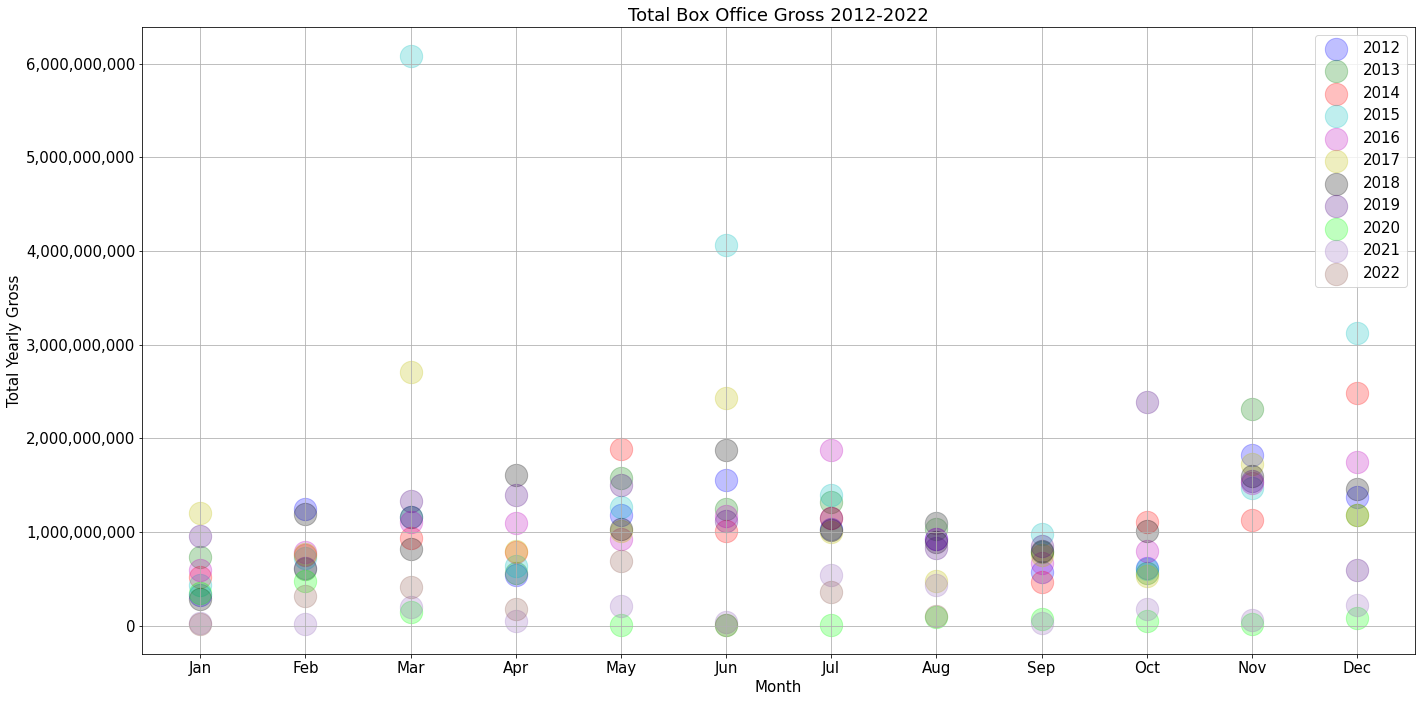

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

gross_per_month_year = movies_clean.groupby(["release_year", "month"])["Gross"].sum()
colors = ["b", "g", "r", "c", "m", "y", "k", "indigo", "lime", "tab:purple", "tab:brown"]

for year,color in zip(range(2012,2023), colors):
    ax.scatter(months, gross_per_month_year[year], c = color,  marker = 'o', s=500,alpha = .25, label= f'{year}')
ax.set_xlabel('Month')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Total Yearly Gross')
ax.set_title(f'Total Box Office Gross 2012-2022')
plt.rcParams.update({'font.size': 15})
plt.grid()
plt.tight_layout()
leg = ax.legend();
plt.show();

In [33]:
movies_clean.runtime_minutes.dropna(inplace = True)
movies_clean.loc[movies_clean.genre1 == "War"]
movies_clean["runtime_minutes"][2197] = 149

<ipython-input-33-167f9b898914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean["runtime_minutes"][2197] = 149


In [34]:
avg_runtime_per_genre = movies_clean.groupby("genre1")["runtime_minutes"].mean().sort_values(ascending= False)

avg_runtime_per_genre

genre_for_runtime = avg_runtime_per_genre.keys()

<ipython-input-35-dd037a3dc58d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_for_runtime, rotation=90)


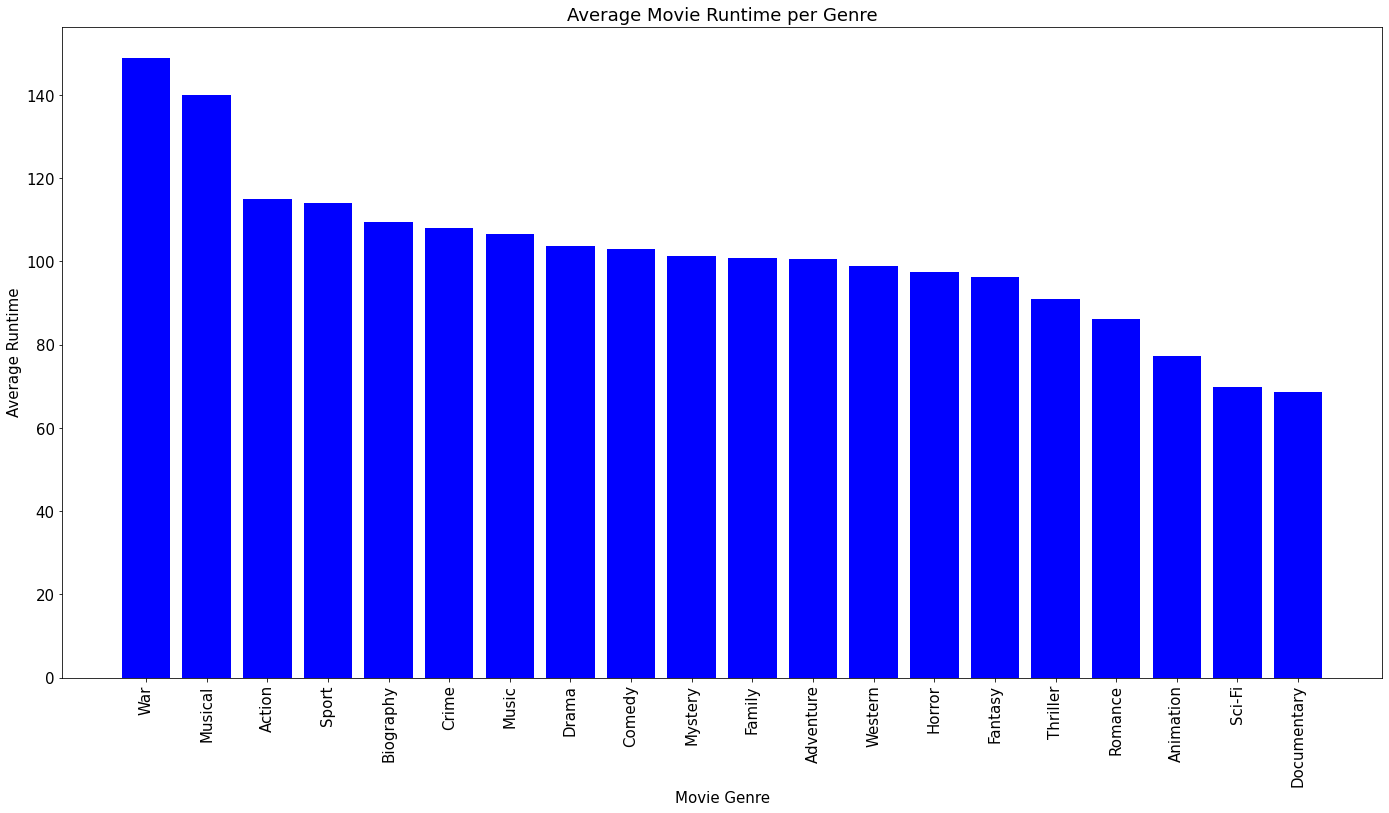

In [35]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(genre_for_runtime, avg_runtime_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(genre_for_runtime, rotation=90)
ax.set_ylabel("Average Runtime")
ax.set_title('Average Movie Runtime per Genre')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 30})
plt.tight_layout()
plt.show();

In [36]:
movies_clean.head()

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,movie_id,runtime_minutes,genre1,genre2,genre3,release_month,month
737,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,tt1657510,101.0,Drama,None,None,Jan,Jan
111,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,tt1598828,91.0,Action,Comedy,Crime,Jan,Jan
2279,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,tt4060234,50.0,Documentary,Sport,None,Jan,Jan
2278,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,tt1698576,84.0,Drama,None,None,Jan,Jan
384,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,tt1904996,118.0,Action,Crime,Thriller,Jan,Jan


In [37]:
budgets = pd.read_excel("/Users/Arsh/Downloads/tn_movie_budgets.xlsx")

budgets

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...
5777,Red 11,7000,0,0
5778,Following,6000,48482,240495
5779,Return to the Land of Wonders,5000,1338,1338
5780,A Plague So Pleasant,1400,0,0


In [38]:
movies_clean = pd.merge(movies_clean, budgets, how = "left", on = "primary_title")

In [39]:
directors = pd.read_sql("""

SELECT  *
FROM directors


""", con)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [40]:
persons = pd.read_sql("""

SELECT  person_id, primary_name
FROM persons


""", con)

persons

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [41]:
movie_directors = pd.merge(directors, persons, how = "inner", on = "person_id")

In [42]:
movies = pd.merge(movies_clean, movie_directors, how = "left", on = "movie_id").drop_duplicates(subset="primary_title")

movies.rename(columns = {"primary_name": "director"}, inplace= True)

movies['production_budget'].fillna(int(movies['production_budget'].mean()), inplace=True)

movies['worldwide_gross'].fillna(int(movies['worldwide_gross'].mean()), inplace=True)

movies['director'].fillna("Praveen Gowtham", inplace=True)

movies["profit"] = movies.worldwide_gross - movies.production_budget

movies["profit_margin"] = ((movies.worldwide_gross - movies.production_budget)/movies.worldwide_gross)* 100

movies["profitable"] = movies["profit"] > 0

In [43]:
movies

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,...,release_month,month,production_budget,domestic_gross,worldwide_gross,person_id,director,profit,profit_margin,profitable
0,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm0470323,Ron Krauss,123951028.0,70.158118,True
1,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,...,Jan,Jan,42000000.0,26414527.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-16.031007,False
5,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,70.158118,True
8,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,...,Jan,Jan,35000000.0,17616641.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,27.899552,True
10,169,Albert Nobbs,3014696,245,"$696,088",245,2022-01-27,May 17,Roadside Attractions,2012,...,Jan,Jan,7500000.0,3014696.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,12.167732,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,92,All the Money in the World,25113707,2123,"$5,584,684","2,074",2022-12-25,Mar 22,TriStar Pictures,2017,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0000631,Ridley Scott,123951028.0,70.158118,True
6972,1,Rogue One: A Star Wars Story,532177324,4157,"$155,081,681","4,157",2022-12-16,May 4,Walt Disney Studios Motion Pictures,2016,...,Dec,Dec,200000000.0,532177324.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,80.936092,True
6977,173,Ben Is Back,3703184,598,"$80,734",4,2022-12-07,Feb 21,Roadside Attractions,2018,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0373282,Peter Hedges,123951028.0,70.158118,True
6978,199,Mr. Six,1415450,32,"$332,117",30,2022-12-24,Jan 31,China Lion Film Distribution,2015,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm1299690,Hu Guan,123951028.0,70.158118,True


In [44]:
top_20_dir_by_profit = movies[["director", "profit"]].sort_values(by = "profit", ascending = False)[:20]
top_20_dir_by_profit["director"]

2495      Anthony Russo
3277    Colin Trevorrow
2250          James Wan
3014        Joss Whedon
1120       Ryan Coogler
3453        J.A. Bayona
6358         Adam Green
1720     Marilyn Barnes
4087      Pierre Coffin
3146        Joss Whedon
3276          Brad Bird
3094        Shane Black
6467          James Wan
2218       F. Gary Gray
3492      Pierre Coffin
1907         Ryan Fleck
5989         Sam Mendes
3802        Jon Favreau
4168      Pierre Coffin
3219        Michael Bay
Name: director, dtype: object

<ipython-input-45-010ceab36778>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_20_dir_by_profit["director"], rotation=90)


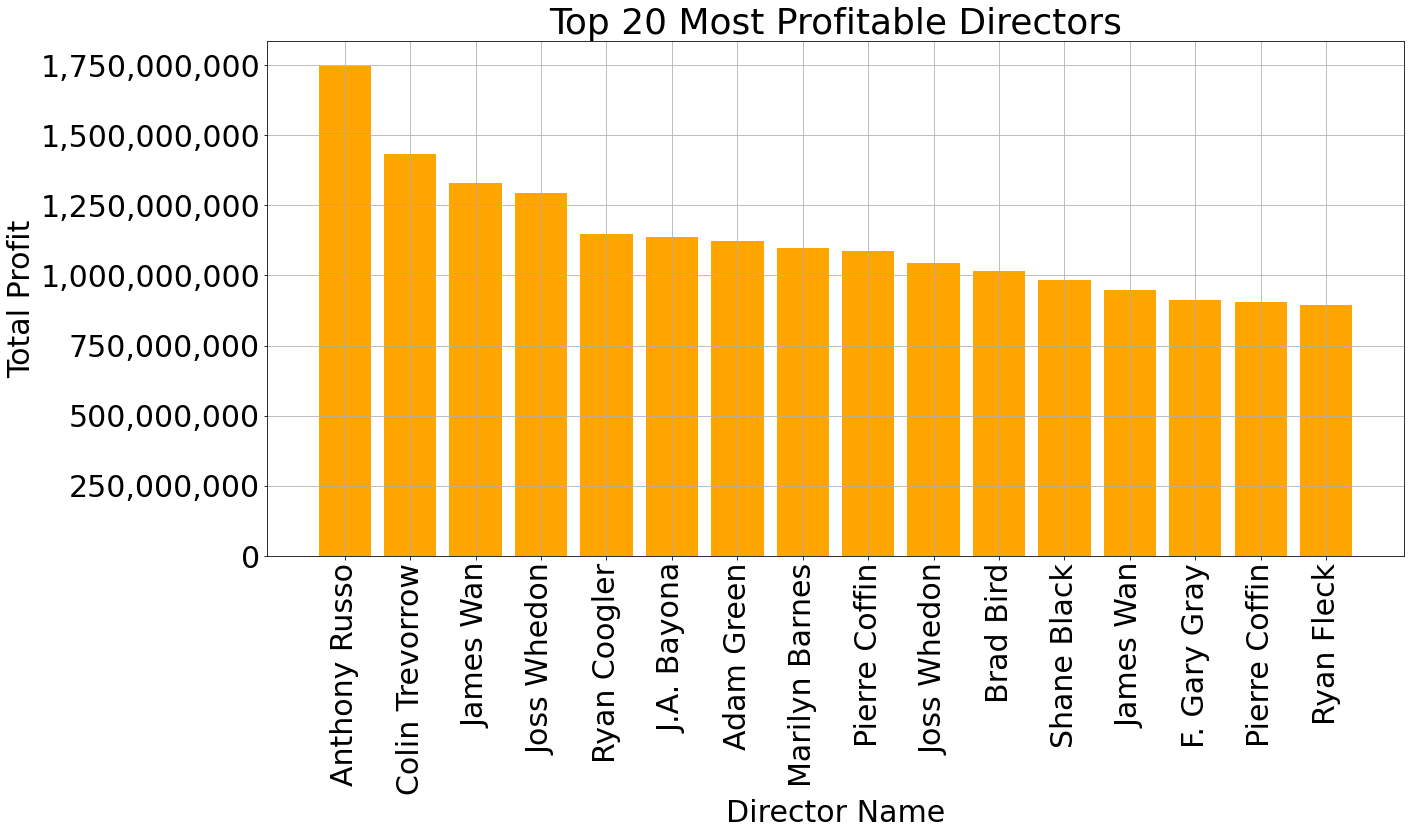

In [45]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(top_20_dir_by_profit["director"], top_20_dir_by_profit["profit"], color = "orange")
ax.set_xlabel('Director Name')
ax.set_xticklabels(top_20_dir_by_profit["director"], rotation=90)
ax.set_ylabel("Total Profit")
ax.set_title('Top 20 Most Profitable Directors')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.tight_layout()
plt.show();

In [46]:
top_20_dir_by_profit_margin = movies[["director", "profit_margin"]].sort_values(by = "profit_margin", ascending = False)[:20]
top_20_dir_by_profit_margin["director"]

3832          Travis Cluff
899     William Brent Bell
2347       Levan Gabriadze
29            Robbie Walsh
1032          Jordan Peele
5518             Jill Wong
3151        Bradley Parker
5644      John R. Leonetti
6486         Nitesh Tiwari
3573        James DeMonaco
4113        Fabrice Gobert
5492      Scott Derrickson
5486        Ariel Schulman
2656             Tom Boyle
4437          Adam Wingard
3320          Lynn Shelton
3225            Josh Boone
5741    Christopher Landon
4665         Alex Kendrick
3585     Steven Soderbergh
Name: director, dtype: object

<ipython-input-47-adf81c7a46f6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_20_dir_by_profit_margin["director"], rotation=90)


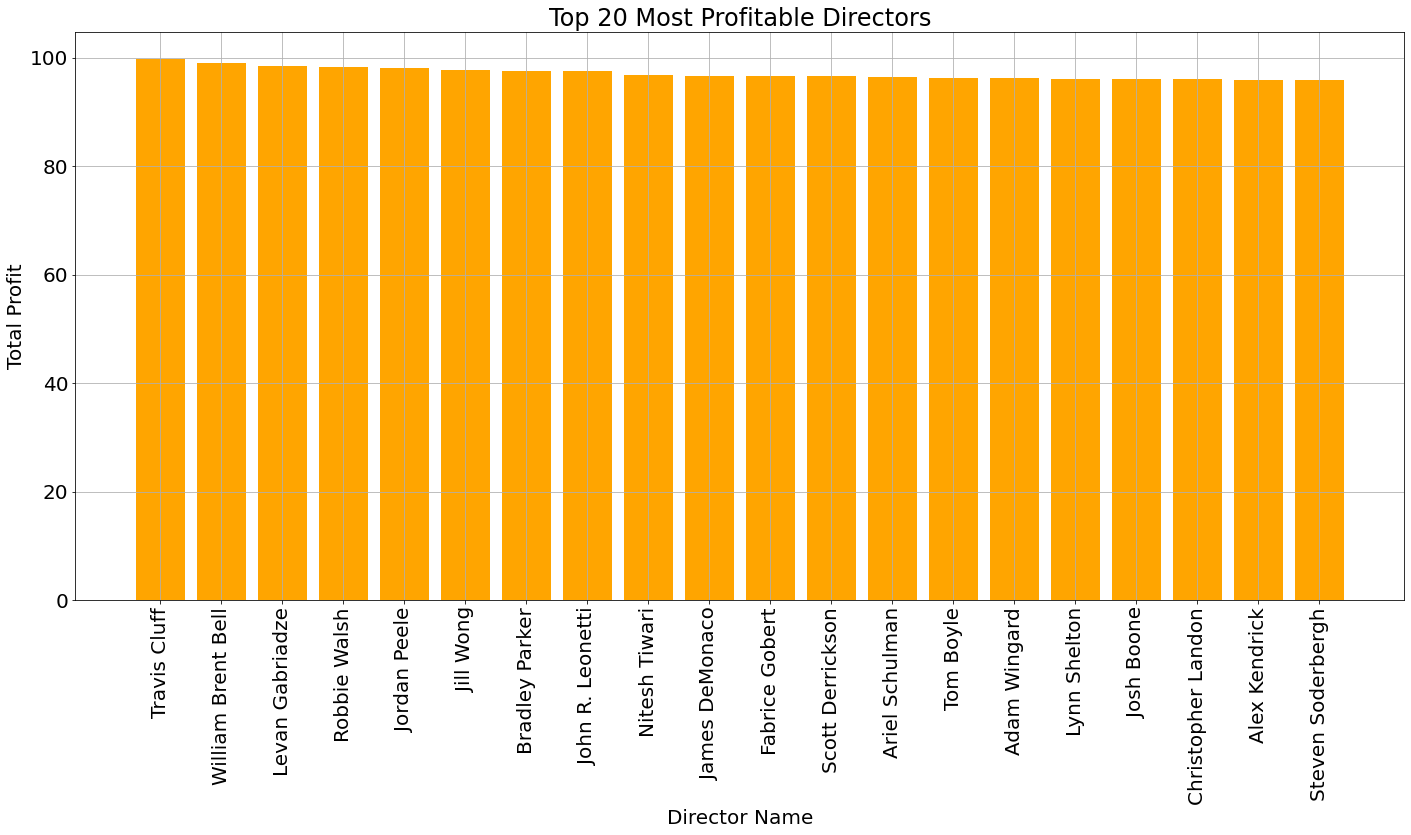

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(top_20_dir_by_profit_margin["director"], top_20_dir_by_profit_margin["profit_margin"], color = "orange")
ax.set_xlabel('Director Name')
ax.set_xticklabels(top_20_dir_by_profit_margin["director"], rotation=90)
ax.set_ylabel("Total Profit")
ax.set_title('Top 20 Most Profitable Directors')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.grid()
plt.tight_layout()
plt.show();

In [48]:
films = movies

In [49]:
movies

,Rank,primary_title,Gross,Max Th,Opening,Open Th,Open,Close,Distributor,release_year,...,release_month,month,production_budget,domestic_gross,worldwide_gross,person_id,director,profit,profit_margin,profitable
0,199,Gimme Shelter,1359910,385,689070,385,2022-01-24,Feb 27,Roadside Attractions,2014,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm0470323,Ron Krauss,123951028.0,70.158118,True
1,102,One for the Money,26414527,"2,737","$11,515,790","2,737",2022-01-27,Apr 12,Lionsgate,2012,...,Jan,Jan,42000000.0,26414527.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-16.031007,False
5,55,The Little Things,15342746,"2,206","$4,705,527","2,171",2022-01-29,NaN,Warner Bros.,2021,...,Jan,Jan,52722794.0,NaN,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,70.158118,True
8,118,Parker,17616641,2238,"$7,008,222","2,224",2022-01-25,Apr 4,FilmDistrict,2013,...,Jan,Jan,35000000.0,17616641.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,27.899552,True
10,169,Albert Nobbs,3014696,245,"$696,088",245,2022-01-27,May 17,Roadside Attractions,2012,...,Jan,Jan,7500000.0,3014696.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,12.167732,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,92,All the Money in the World,25113707,2123,"$5,584,684","2,074",2022-12-25,Mar 22,TriStar Pictures,2017,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0000631,Ridley Scott,123951028.0,70.158118,True
6972,1,Rogue One: A Star Wars Story,532177324,4157,"$155,081,681","4,157",2022-12-16,May 4,Walt Disney Studios Motion Pictures,2016,...,Dec,Dec,200000000.0,532177324.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,80.936092,True
6977,173,Ben Is Back,3703184,598,"$80,734",4,2022-12-07,Feb 21,Roadside Attractions,2018,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm0373282,Peter Hedges,123951028.0,70.158118,True
6978,199,Mr. Six,1415450,32,"$332,117",30,2022-12-24,Jan 31,China Lion Film Distribution,2015,...,Dec,Dec,52722794.0,NaN,1.766738e+08,nm1299690,Hu Guan,123951028.0,70.158118,True


In [50]:
films = films.drop('Max Th', axis = 1)
films =films.drop('Open Th', axis = 1)
films =films.drop('Opening', axis = 1)
films =films.drop('Close', axis = 1)
films =films.drop('runtime_minutes', axis = 1)
films =films.drop('month', axis = 1)
films =films.drop('person_id', axis = 1)
films = films.loc[films['release_year'] >= 2001]
films['production_budget'].astype(int)
films.loc[films['production_budget'] <= 5000000, 'budget_tier'] = 'low_tier'
films.loc[films['production_budget'] >= 50000000, 'budget_tier'] = 'high_tier'
films['budget_tier'] = films['budget_tier'].fillna('mid_tier')
films = films.sort_values(by="profit_margin", ascending=False)
films = films.drop('Open', axis = 1)
films

,Rank,primary_title,Gross,Distributor,release_year,movie_id,genre1,genre2,genre3,release_month,production_budget,domestic_gross,worldwide_gross,director,profit,profit_margin,profitable,budget_tier
3832,96,The Gallows,22764410,Warner Bros.,2015,tt2309260,Horror,Mystery,Thriller,Jul,100000.0,22764410.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier
899,63,The Devil Inside,53261944,Paramount Pictures,2012,tt1560985,Horror,None,None,Jan,1000000.0,53262945.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier
2347,79,Unfriended,32482090,Universal Pictures,2015,tt3713166,Horror,Mystery,Thriller,Apr,1000000.0,32789645.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier
29,23,Split,138291365,Universal Pictures,2017,tt3604256,Crime,None,None,Jan,5000000.0,138141585.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier
1032,15,Get Out,176040665,Universal Pictures,2017,tt5052448,Horror,Mystery,Thriller,Feb,5000000.0,176040665.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,115,After,12138565,Aviron Pictures,2019,tt8692378,Adventure,None,None,Apr,650000.0,0.0,0.0,Shaun Peter Cunningham,-650000.0,-inf,False,low_tier
4264,17,Unhinged,20831465,Solstice Studios,2020,tt4430648,Adventure,Documentary,Music,Aug,29000000.0,0.0,0.0,Brian Stanley Allen,-29000000.0,-inf,False,mid_tier
4972,55,Ad Astra,50188370,Twentieth Century Fox,2019,tt2935510,Adventure,Drama,Mystery,Sep,49800000.0,0.0,0.0,James Gray,-49800000.0,-inf,False,mid_tier
5024,140,The Goldfinch,5332621,Warner Bros.,2019,tt3864056,Drama,None,None,Sep,40000000.0,0.0,0.0,John Crowley,-40000000.0,-inf,False,mid_tier


In [51]:
films = films[films['profitable'] == 1].sort_values(by='profit_margin', ascending = False)

In [52]:
films.drop('domestic_gross', axis =1, inplace=True)

In [53]:
films

,Rank,primary_title,Gross,Distributor,release_year,movie_id,genre1,genre2,genre3,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier
3832,96,The Gallows,22764410,Warner Bros.,2015,tt2309260,Horror,Mystery,Thriller,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier
899,63,The Devil Inside,53261944,Paramount Pictures,2012,tt1560985,Horror,None,None,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier
2347,79,Unfriended,32482090,Universal Pictures,2015,tt3713166,Horror,Mystery,Thriller,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier
29,23,Split,138291365,Universal Pictures,2017,tt3604256,Crime,None,None,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier
1032,15,Get Out,176040665,Universal Pictures,2017,tt5052448,Horror,Mystery,Thriller,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,103,Alex Cross,25888412,Lionsgate,2012,tt1712170,Action,Crime,Mystery,Oct,35000000.0,35426759.0,Rob Cohen,426759.0,1.204623,True,mid_tier
3631,88,That's My Boy,36931089,Sony Pictures Entertainment (SPE),2012,tt1232200,Comedy,None,None,Jun,57500000.0,58085235.0,Sean Anders,585235.0,1.007545,True,high_tier
5362,73,Pan,35088320,Warner Bros.,2015,tt3332064,Adventure,Comedy,Family,Oct,150000000.0,151525973.0,Joe Wright,1525973.0,1.007070,True,high_tier
2754,42,Firestarter,9589250,Universal Pictures,2022,tt5827954,Documentary,None,None,May,15000000.0,15136870.0,Jamie Bailey,136870.0,0.904216,True,mid_tier


In [54]:
films.isna().sum()

Rank                   0
primary_title          0
Gross                  0
Distributor           20
release_year           0
movie_id               0
genre1                12
genre2               310
genre3               661
release_month          0
production_budget      0
worldwide_gross        0
director               0
profit                 0
profit_margin          0
profitable             0
budget_tier            0
dtype: int64

In [55]:
films = films.drop_duplicates(subset=['primary_title'], keep='first', inplace=False)
films = films.dropna(subset=['genre1'])
films = films.dropna(subset=['Distributor'])
films.isna().sum()

Rank                   0
primary_title          0
Gross                  0
Distributor            0
release_year           0
movie_id               0
genre1                 0
genre2               295
genre3               639
release_month          0
production_budget      0
worldwide_gross        0
director               0
profit                 0
profit_margin          0
profitable             0
budget_tier            0
dtype: int64

In [56]:
films = films.drop('profitable', axis = 1)
films

,Rank,primary_title,Gross,Distributor,release_year,movie_id,genre1,genre2,genre3,release_month,production_budget,worldwide_gross,director,profit,profit_margin,budget_tier
3832,96,The Gallows,22764410,Warner Bros.,2015,tt2309260,Horror,Mystery,Thriller,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,low_tier
899,63,The Devil Inside,53261944,Paramount Pictures,2012,tt1560985,Horror,None,None,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,low_tier
2347,79,Unfriended,32482090,Universal Pictures,2015,tt3713166,Horror,Mystery,Thriller,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,low_tier
29,23,Split,138291365,Universal Pictures,2017,tt3604256,Crime,None,None,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,low_tier
1032,15,Get Out,176040665,Universal Pictures,2017,tt5052448,Horror,Mystery,Thriller,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,low_tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,103,Alex Cross,25888412,Lionsgate,2012,tt1712170,Action,Crime,Mystery,Oct,35000000.0,35426759.0,Rob Cohen,426759.0,1.204623,mid_tier
3631,88,That's My Boy,36931089,Sony Pictures Entertainment (SPE),2012,tt1232200,Comedy,None,None,Jun,57500000.0,58085235.0,Sean Anders,585235.0,1.007545,high_tier
5362,73,Pan,35088320,Warner Bros.,2015,tt3332064,Adventure,Comedy,Family,Oct,150000000.0,151525973.0,Joe Wright,1525973.0,1.007070,high_tier
2754,42,Firestarter,9589250,Universal Pictures,2022,tt5827954,Documentary,None,None,May,15000000.0,15136870.0,Jamie Bailey,136870.0,0.904216,mid_tier


In [57]:
films.to_csv('films.csv', index=0)

In [58]:
films = pd.read_csv('/Users/Arsh/Flatiron/Gitlab/films.csv')
films.head()

,Rank,title,domestic_gross,worldwide_gross,production_budget,profit,profit_margin,budget_tier,genre1,genre2,genre3,director,distributor,open,release_month,release_year,movie_id
0,96,The Gallows,22764410,41656474.0,100000.0,41556474.0,99.759941,low_tier,Horror,Mystery,Thriller,Travis Cluff,Warner Bros.,2022-07-10,Jul,2015,tt2309260
1,63,The Devil Inside,53261944,101759490.0,1000000.0,100759490.0,99.017291,low_tier,Horror,NaN,NaN,William Brent Bell,Paramount Pictures,2022-01-06,Jan,2012,tt1560985
2,79,Unfriended,32482090,64364198.0,1000000.0,63364198.0,98.446341,low_tier,Horror,Mystery,Thriller,Levan Gabriadze,Universal Pictures,2022-04-17,Apr,2015,tt3713166
3,23,Split,138291365,278964806.0,5000000.0,273964806.0,98.207659,low_tier,Crime,NaN,NaN,Robbie Walsh,Universal Pictures,2022-01-20,Jan,2017,tt3604256
4,15,Get Out,176040665,255367951.0,5000000.0,250367951.0,98.042041,low_tier,Horror,Mystery,Thriller,Jordan Peele,Universal Pictures,2022-02-24,Feb,2017,tt5052448


In [59]:
films.shape

(1505, 17)

In [60]:
low = films[films['budget_tier'] == 'low_tier'].sort_values(by='profit_margin', ascending = False)
mid = films[films['budget_tier'] == 'mid_tier'].sort_values(by='profit_margin', ascending = False)
high = films[films['budget_tier'] == 'high_tier'].sort_values(by='profit_margin', ascending = False)
print(low.shape)
print(mid.shape)
print(high.shape)

(105, 17)
(404, 17)
(996, 17)


In [61]:
films.shape

(1505, 17)

In [62]:
high.groupby(['genre1','genre2'])['genre1'].count().sort_values(ascending=False)

genre1     genre2   
Action     Adventure    153
Comedy     Drama         83
Adventure  Animation     67
Biography  Drama         48
Action     Drama         31
                       ... 
Drama      Sci-Fi         1
Animation  Fantasy        1
           Drama          1
Adventure  Sci-Fi         1
Animation  Family         1
Name: genre1, Length: 73, dtype: int64

In [63]:
z = high.groupby(['release_month', 'genre1'])['profit_margin'].sum()
print("Jan", z['Jan'].sort_values(ascending=False))
print("Feb", z['Feb'].sort_values(ascending=False))
print("Mar", z['Mar'].sort_values(ascending=False))
print("Jun", z['Jun'].sort_values(ascending=False))
print("Jul", z['Jul'].sort_values(ascending=False))
print("Aug", z['Aug'].sort_values(ascending=False))
print("Nov", z['Nov'].sort_values(ascending=False))
print("Dec", z['Dec'].sort_values(ascending=False))

Jan genre1
Action         1036.170089
Drama           841.897413
Adventure       420.948706
Documentary     280.632471
Biography       140.316235
Mystery          70.158118
Horror           70.158118
Comedy           70.158118
Animation        70.158118
Name: profit_margin, dtype: float64
Feb genre1
Action         1743.771595
Drama          1450.672412
Comedy         1319.568663
Adventure       442.435710
Documentary     210.474353
Biography       210.474353
Horror          199.557091
Crime           140.316235
Animation       140.316235
Thriller         70.158118
Sci-Fi           70.158118
Name: profit_margin, dtype: float64
Mar genre1
Action         2071.885505
Drama          1258.733756
Comedy         1052.371766
Adventure       889.556362
Documentary     373.243618
Biography       280.632471
Horror          140.316235
Family           87.293517
Musical          82.228087
Crime            70.158118
Name: profit_margin, dtype: float64
Jun genre1
Action         1801.826277
Drama      

In [64]:
q = mid.groupby(['release_month', 'genre1'])['profit_margin'].sum()
print("Jan", q['Jan'].sort_values(ascending=False))
print("Feb", q['Feb'].sort_values(ascending=False))
print("Mar", q['Mar'].sort_values(ascending=False))
print("Jun", q['Jun'].sort_values(ascending=False))
print("Jul", q['Jul'].sort_values(ascending=False))
print("Aug", q['Aug'].sort_values(ascending=False))
print("Nov", q['Nov'].sort_values(ascending=False))
print("Dec", q['Dec'].sort_values(ascending=False))

Jan genre1
Action       938.135654
Comedy       473.858584
Drama        427.427040
Horror       250.137363
Adventure    116.568720
Biography     38.532631
Name: profit_margin, dtype: float64
Feb genre1
Drama        624.928215
Comedy       391.696328
Action       246.802482
Biography    227.277413
Adventure     80.041238
Crime         77.961152
Horror        69.681216
Name: profit_margin, dtype: float64
Mar genre1
Comedy       599.503929
Biography    296.943759
Drama        211.981832
Action       170.866519
Crime        149.760410
Adventure     81.095401
Name: profit_margin, dtype: float64
Jun genre1
Comedy       526.419645
Drama        513.312981
Action       384.362914
Biography    110.915816
Horror        79.636481
Adventure     15.016276
Name: profit_margin, dtype: float64
Jul genre1
Comedy         575.004302
Action         432.797517
Drama          364.530643
Adventure      195.395265
Horror         172.525205
Crime          103.876378
Animation       91.256979
Documentary     71.

In [65]:
w = low.groupby(['release_month', 'genre1'])['profit_margin'].sum()
print("Jan", w['Jan'].sort_values(ascending=False))
print("Feb", w['Feb'].sort_values(ascending=False))
print("Mar", w['Mar'].sort_values(ascending=False))
print("Jun", w['Jun'].sort_values(ascending=False))
print("Jul", w['Jul'].sort_values(ascending=False))
print("Aug", w['Aug'].sort_values(ascending=False))
print("Nov", w['Nov'].sort_values(ascending=False))
print("Dec", w['Dec'].sort_values(ascending=False))

Jan genre1
Horror    286.026669
Comedy    279.194265
Drama     166.636826
Crime      98.207659
Name: profit_margin, dtype: float64
Feb genre1
Horror         276.355705
Biography      171.056836
Documentary    131.738687
Name: profit_margin, dtype: float64
Mar genre1
Drama        491.958686
Horror       232.310997
Comedy       134.842225
Fantasy       83.921628
Adventure     80.414813
Name: profit_margin, dtype: float64
Jun genre1
Comedy       357.198513
Adventure    230.383668
Horror       171.358217
Action        81.876709
Name: profit_margin, dtype: float64
Jul genre1
Comedy       405.871172
Drama        189.655844
Horror        99.759941
Biography     94.871691
Crime         93.915272
Name: profit_margin, dtype: float64
Aug genre1
Drama          242.588048
Action         184.610650
Comedy         125.470859
Animation       88.045160
Documentary     32.960943
Name: profit_margin, dtype: float64
Nov genre1
Biography    91.750787
Action       51.920943
Name: profit_margin, dtype: float

In [66]:
low.groupby('genre1').sum()

,Rank,domestic_gross,worldwide_gross,production_budget,profit,profit_margin,release_year
genre1,,,,,,,
Action,982,76319722,1.210916e+08,17250000.0,1.038416e+08,560.122503,14108
Adventure,835,53267994,9.759712e+07,14216000.0,8.338112e+07,488.263541,12094
Animation,106,21321100,4.182407e+07,5000000.0,3.682407e+07,88.045160,2014
Biography,750,96150944,1.644372e+08,20400000.0,1.440372e+08,473.867798,12086
Comedy,3521,274444892,3.666032e+08,64730000.0,3.018732e+08,1760.194736,50372
Crime,156,147158110,2.953994e+08,6000000.0,2.893994e+08,192.122931,4035
Documentary,1275,37159680,4.620414e+07,22200000.0,2.400414e+07,373.080911,16126
Drama,3336,395375538,6.915800e+08,79450000.0,6.121300e+08,1768.247100,50374
Fantasy,116,12985600,1.430493e+07,2300000.0,1.200493e+07,83.921628,2015


In [67]:
films.to_csv('films.csv', index=0)

In [68]:
movies.shape

(1704, 25)

In [69]:
movies_clean.shape

(2579, 20)

In [70]:
movies2 = movies.drop('Rank', axis = 1)
movies2 = movies2.drop('month', axis = 1)
movies2 = movies2.drop('movie_id', axis = 1)
movies2 = movies2.drop('domestic_gross', axis = 1)
movies2 = movies2.drop('Open', axis = 1)
movies2 = movies2.drop('Close', axis = 1)
movies2 = movies2.drop('genre3', axis = 1)
movies2 = movies2.drop('Max Th', axis = 1)
movies2 = movies2.drop('Open Th', axis = 1)
movies2 = movies2.drop('Opening', axis = 1)
movies2.shape

(1704, 15)

In [71]:
movies2

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,person_id,director,profit,profit_margin,profitable
0,Gimme Shelter,1359910,Roadside Attractions,2014,101.0,Drama,None,Jan,52722794.0,1.766738e+08,nm0470323,Ron Krauss,123951028.0,70.158118,True
1,One for the Money,26414527,Lionsgate,2012,91.0,Action,Comedy,Jan,42000000.0,3.619722e+07,nm1455688,Julie Anne Robinson,-5802779.0,-16.031007,False
5,The Little Things,15342746,Warner Bros.,2021,50.0,Documentary,Sport,Jan,52722794.0,1.766738e+08,nm4352732,Darcy Hennessey Turenne,123951028.0,70.158118,True
8,Parker,17616641,FilmDistrict,2013,118.0,Action,Crime,Jan,35000000.0,4.854339e+07,nm0000431,Taylor Hackford,13543388.0,27.899552,True
10,Albert Nobbs,3014696,Roadside Attractions,2012,113.0,Drama,Romance,Jan,7500000.0,8.539003e+06,nm0006554,Rodrigo García,1039003.0,12.167732,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6970,All the Money in the World,25113707,TriStar Pictures,2017,132.0,Biography,Crime,Dec,52722794.0,1.766738e+08,nm0000631,Ridley Scott,123951028.0,70.158118,True
6972,Rogue One: A Star Wars Story,532177324,Walt Disney Studios Motion Pictures,2016,133.0,Action,Adventure,Dec,200000000.0,1.049103e+09,nm2284484,Gareth Edwards,849102856.0,80.936092,True
6977,Ben Is Back,3703184,Roadside Attractions,2018,103.0,Drama,None,Dec,52722794.0,1.766738e+08,nm0373282,Peter Hedges,123951028.0,70.158118,True
6978,Mr. Six,1415450,China Lion Film Distribution,2015,134.0,Action,Drama,Dec,52722794.0,1.766738e+08,nm1299690,Hu Guan,123951028.0,70.158118,True


In [72]:
movies2.isna().sum()

primary_title          0
Gross                  0
Distributor           24
release_year           0
runtime_minutes      210
genre1                12
genre2               326
release_month          0
production_budget      0
worldwide_gross        0
person_id             18
director               0
profit                 0
profit_margin          0
profitable             0
dtype: int64

In [73]:
movies2.shape

(1704, 15)

In [74]:
movies2.isna().sum()

primary_title          0
Gross                  0
Distributor           24
release_year           0
runtime_minutes      210
genre1                12
genre2               326
release_month          0
production_budget      0
worldwide_gross        0
person_id             18
director               0
profit                 0
profit_margin          0
profitable             0
dtype: int64

In [75]:
movies2.dropna(subset=['genre1'], inplace=True)
movies2.shape

(1692, 15)

In [76]:
movies2['runtime_minutes'].fillna(movies2['runtime_minutes'].mean(), inplace=True)
movies2.isna().sum()

primary_title          0
Gross                  0
Distributor           24
release_year           0
runtime_minutes        0
genre1                 0
genre2               314
release_month          0
production_budget      0
worldwide_gross        0
person_id             12
director               0
profit                 0
profit_margin          0
profitable             0
dtype: int64

In [77]:
movies2.shape

(1692, 15)

After cleaning the data, I will add several categorical columns, based on ideas I expressed in other notebooks, to categorize movies along several categories including budget and runtime.

In [78]:
movies2.loc[movies2['production_budget'] <= 5000000, 'budget_tier'] = 'low_tier'
movies2.loc[movies2['production_budget'] >= 50000000, 'budget_tier'] = 'high_tier'
movies2['budget_tier'] = movies2['budget_tier'].fillna('mid_tier')
movies2.loc[movies2['runtime_minutes'] <= 90, 'movie_length'] = 'short'
movies2.loc[movies2['runtime_minutes'] >= 150, 'movie_length'] = 'long'
movies2['movie_length'] = movies2['movie_length'].fillna('normal')
movies2 = movies2.sort_values(by='profit_margin', ascending = False)
movies2.head(20)

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,person_id,director,profit,profit_margin,profitable,budget_tier,movie_length
3832,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,nm4000389,Travis Cluff,41556474.0,99.759941,True,low_tier,short
899,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,None,Jan,1000000.0,101759490.0,nm0068587,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2347,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,nm0300174,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
29,Split,138291365,Universal Pictures,2017,107.11193,Crime,None,Jan,5000000.0,278964806.0,nm3334461,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
1032,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,nm1443502,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
5518,Moonlight,27854932,A24,2016,87.00000,Horror,None,Oct,1500000.0,65245512.0,nm2699710,Jill Wong,63745512.0,97.700991,True,low_tier,short
3151,Chernobyl Diaries,18119640,Warner Bros.,2012,86.00000,Horror,Mystery,May,1000000.0,42411721.0,nm0662086,Bradley Parker,41411721.0,97.642161,True,low_tier,short
5644,Annabelle,84273813,Warner Bros.,2014,99.00000,Horror,Mystery,Oct,6500000.0,256862920.0,nm0502954,John R. Leonetti,250362920.0,97.469467,True,mid_tier,normal
6486,Dangal,12391761,UTV Motion Pictures,2016,161.00000,Action,Biography,Dec,9500000.0,294654618.0,nm4318159,Nitesh Tiwari,285154618.0,96.775886,True,mid_tier,long
3573,The Purge,64473115,Universal Pictures,2013,85.00000,Horror,Thriller,Jun,3000000.0,91266581.0,nm0218621,James DeMonaco,88266581.0,96.712926,True,low_tier,short


In [79]:
df = movies2

In [80]:
df.shape

(1692, 17)

This is the last sanity check on the shared df. Said df was renamed from movies2 to df for the sake of simplicity.

In [81]:
df.to_csv('thecsv', index=0)

In [82]:
print(df.profitable.unique()) 

[ True False]


In [83]:
print(df.budget_tier.unique()) 

['low_tier' 'mid_tier' 'high_tier']


In [84]:
print(df.movie_length.unique()) 

['short' 'normal' 'long']


In [85]:
print(df.genre1.unique()) 

['Horror' 'Crime' 'Action' 'Drama' 'Comedy' 'Biography' 'Adventure'
 'Animation' 'Documentary' 'Family' 'Thriller' 'Fantasy' 'Musical' 'War'
 'Western' 'Mystery' 'Romance' 'Sci-Fi' 'Music']


In [86]:
print(df.genre2.unique()) 

['Mystery' None 'Biography' 'Thriller' 'Romance' 'Comedy' 'Drama'
 'Fantasy' 'Horror' 'Animation' 'Family' 'Adventure' 'Documentary' 'Music'
 'Sci-Fi' 'Crime' 'Western' 'Sport' 'History' 'War' 'News' 'Musical']


In [87]:
cat_cols =  ['profitable', 'budget_tier', 'movie_length', 'genre1', 'genre2']
df[cat_cols] = \
df[cat_cols].astype('category')

In [88]:
df.dtypes

primary_title          object
Gross                   int64
Distributor            object
release_year            int64
runtime_minutes       float64
genre1               category
genre2               category
release_month          object
production_budget     float64
worldwide_gross       float64
person_id              object
director               object
profit                float64
profit_margin         float64
profitable           category
budget_tier          category
movie_length         category
dtype: object

In [89]:
df = df.drop('person_id', axis = 1)
df.shape

(1692, 16)

In [90]:
df

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier,movie_length
3832,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier,short
899,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,NaN,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2347,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
29,Split,138291365,Universal Pictures,2017,107.11193,Crime,NaN,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
1032,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,After,12138565,Aviron Pictures,2019,107.11193,Adventure,NaN,Apr,650000.0,0.0,Shaun Peter Cunningham,-650000.0,-inf,False,low_tier,normal
4493,Blinded by the Light,11901145,Warner Bros.,2019,117.00000,Biography,Comedy,Aug,15000000.0,0.0,Gurinder Chadha,-15000000.0,-inf,False,mid_tier,normal
4972,Ad Astra,50188370,Twentieth Century Fox,2019,107.11193,Adventure,Drama,Sep,49800000.0,0.0,James Gray,-49800000.0,-inf,False,mid_tier,normal
4264,Unhinged,20831465,Solstice Studios,2020,12.00000,Adventure,Documentary,Aug,29000000.0,0.0,Brian Stanley Allen,-29000000.0,-inf,False,mid_tier,short


The last thing I did to my data before I will visualize it is remove unprofitable movies. 

In [91]:
df = df[df['profitable'] == 1].sort_values(by='profit_margin', ascending = False)
df

,primary_title,Gross,Distributor,release_year,runtime_minutes,genre1,genre2,release_month,production_budget,worldwide_gross,director,profit,profit_margin,profitable,budget_tier,movie_length
3832,The Gallows,22764410,Warner Bros.,2015,81.00000,Horror,Mystery,Jul,100000.0,41656474.0,Travis Cluff,41556474.0,99.759941,True,low_tier,short
899,The Devil Inside,53261944,Paramount Pictures,2012,83.00000,Horror,NaN,Jan,1000000.0,101759490.0,William Brent Bell,100759490.0,99.017291,True,low_tier,short
2347,Unfriended,32482090,Universal Pictures,2015,83.00000,Horror,Mystery,Apr,1000000.0,64364198.0,Levan Gabriadze,63364198.0,98.446341,True,low_tier,short
29,Split,138291365,Universal Pictures,2017,107.11193,Crime,NaN,Jan,5000000.0,278964806.0,Robbie Walsh,273964806.0,98.207659,True,low_tier,normal
1032,Get Out,176040665,Universal Pictures,2017,104.00000,Horror,Mystery,Feb,5000000.0,255367951.0,Jordan Peele,250367951.0,98.042041,True,low_tier,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,Alex Cross,25888412,Lionsgate,2012,101.00000,Action,Crime,Oct,35000000.0,35426759.0,Rob Cohen,426759.0,1.204623,True,mid_tier,normal
3631,That's My Boy,36931089,Sony Pictures Entertainment (SPE),2012,116.00000,Comedy,NaN,Jun,57500000.0,58085235.0,Sean Anders,585235.0,1.007545,True,high_tier,normal
5362,Pan,35088320,Warner Bros.,2015,111.00000,Adventure,Comedy,Oct,150000000.0,151525973.0,Joe Wright,1525973.0,1.007070,True,high_tier,normal
2754,Firestarter,9589250,Universal Pictures,2022,94.00000,Documentary,NaN,May,15000000.0,15136870.0,Jamie Bailey,136870.0,0.904216,True,mid_tier,normal


In [92]:
y = df['Distributor'].value_counts().head(10)

NameError: name 'x' is not defined

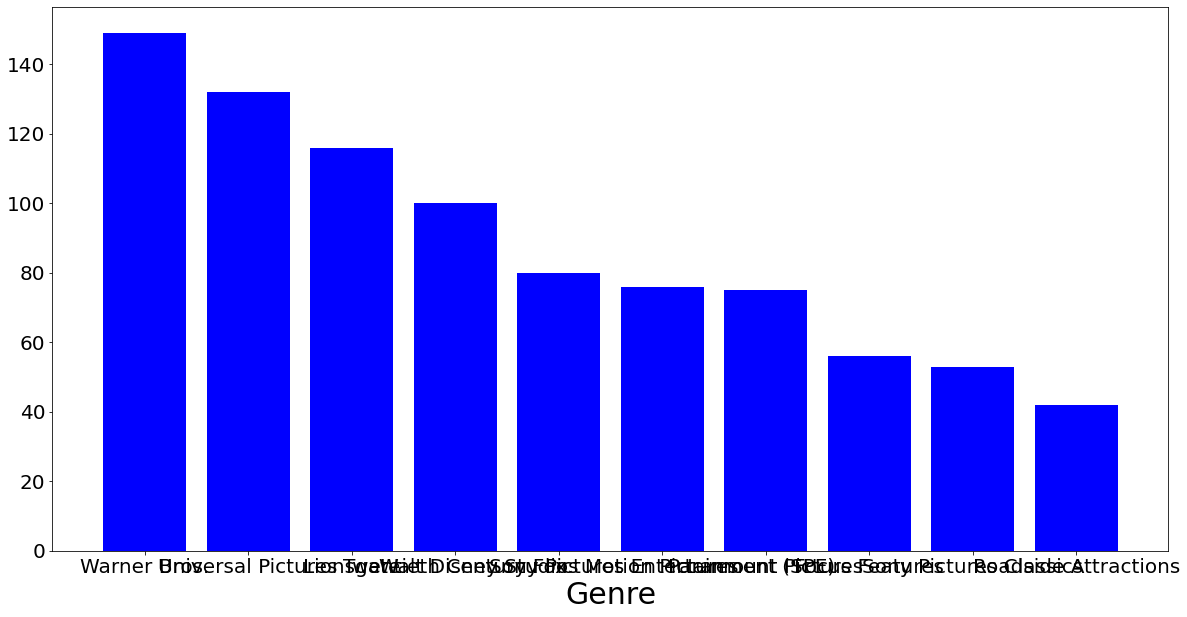

In [93]:
s = list(y.keys())
d = list(y)
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(s, d, color ='blue')
plt.xlabel("Genre", fontsize = 30)
ax.set_xticklabels(x, rotation=90)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel('Number of Films', fontsize = 30)
plt.title("Number of films by studio (2012-2022)", fontsize = 40)
plt.show()